In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("cc.csv")
print(df.shape)
df.head()


(500, 11)


,age,income,loan_amount,loan_duration,credit_score,num_credit_cards,num_loans,employment_years,education_level,marital_status,approved
0,0.993467,1.071200,0.592567,-4.013418,0.580673,2.148556,-1.366858,0.450574,Master,Married,1
1,0.596767,-1.768261,-0.497571,0.401488,-1.447445,1.525944,1.001825,-0.280734,PhD,Married,0
2,0.673822,0.201179,0.418206,4.157154,2.079148,-5.576297,0.425844,0.558792,Master,Married,1
3,-2.064306,-2.427503,1.303508,-2.947792,-1.848508,4.262309,-0.975366,-0.508084,PhD,Single,0
4,2.566200,0.234737,-0.224319,-2.482649,1.162774,-0.294132,1.311167,0.514352,Bachelor,Single,1


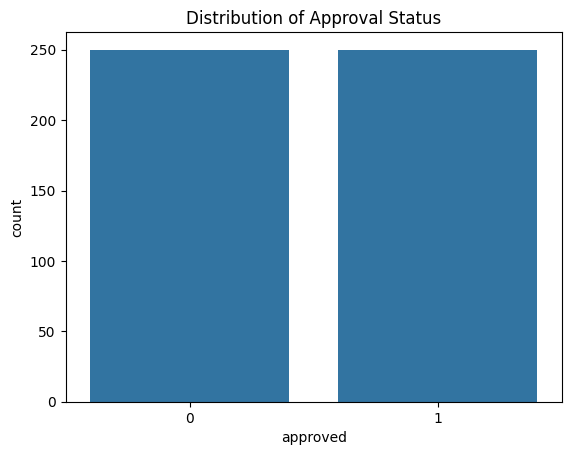

In [ ]:
sns.countplot(x='approved', data= df)
plt.title("Distribution of Approval Status")
plt.show()

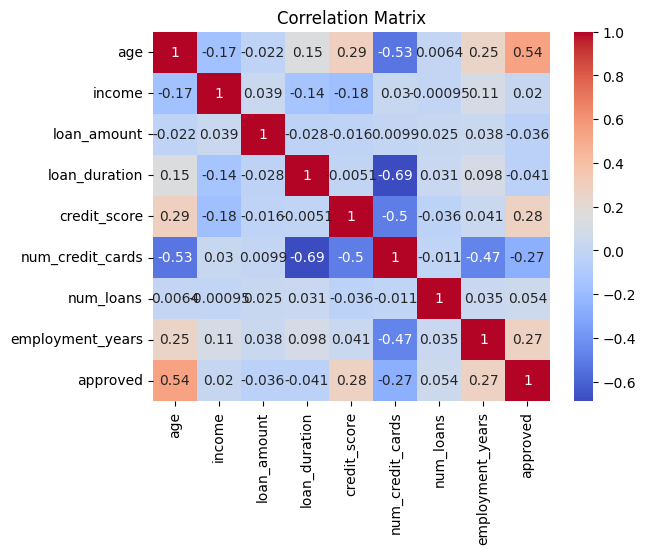

In [ ]:
num_cols = df.select_dtypes(include=np.number)
corr = num_cols.corr()

plt.Figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [16]:
from tkinter import _test

le = LabelEncoder()
df['education_level'] = le.fit_transform(df['education_level'])
df['marital_status'] = le.fit_transform(df['marital_status'])

X = df.drop('approved', axis=1)
y = df['approved']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=42)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classfication Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[37  0]
 [14 49]]
Classfication Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        37
           1       1.00      0.78      0.88        63

    accuracy                           0.86       100
   macro avg       0.86      0.89      0.86       100
weighted avg       0.90      0.86      0.86       100



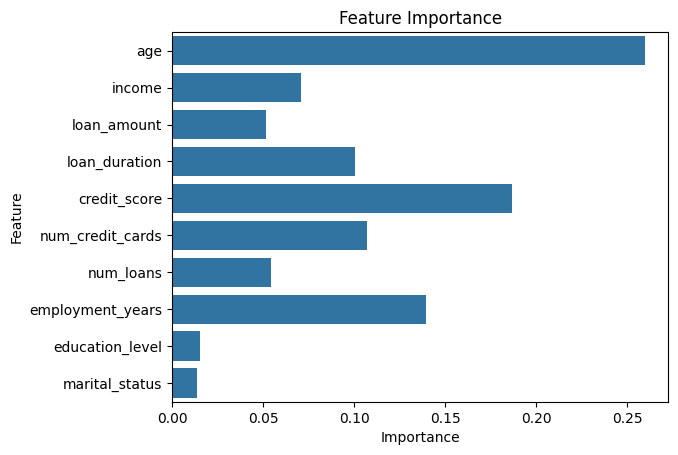

In [20]:
importances = model.feature_importances_
features = X.columns

plt.Figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("Logistic Regression")
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))


Logistic Regression
Confusion Matrix:
 [[34  3]
 [15 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79        37
           1       0.94      0.76      0.84        63

    accuracy                           0.82       100
   macro avg       0.82      0.84      0.82       100
weighted avg       0.85      0.82      0.82       100

Confusion Matrix:
 [[34  3]
 [15 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79        37
           1       0.94      0.76      0.84        63

    accuracy                           0.82       100
   macro avg       0.82      0.84      0.82       100
weighted avg       0.85      0.82      0.82       100



In [26]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

print("K-Nearest Neighbors")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))

K-Nearest Neighbors
Confusion Matrix:
 [[36  1]
 [15 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82        37
           1       0.98      0.76      0.86        63

    accuracy                           0.84       100
   macro avg       0.84      0.87      0.84       100
weighted avg       0.88      0.84      0.84       100

